## Analysis of variance

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv("genomes.csv", header=0, sep=";")
data.head()

,organism,group,size,GC,habitat,temp.group,temperature
0,Acaryochloris marina MBIC11017,Cyanobacteria,8.36,47.0,Aquatic,Mesophilic,NaN
1,Acholeplasma laidlawii PG-8A,Firmicutes,1.5,31.9,Specialized,Mesophilic,37.0
2,Acidiphilium cryptum JF-5,Alphaproteobacteria,3.97,67.1,Multiple,Mesophilic,35.0
3,Acidithiobacillus ferrooxidans ATCC 53993,Other Bacteria,2.9,58.9,Specialized,Mesophilic,NaN
4,Acidothermus cellulolyticus 11B,Actinobacteria,2.4,66.9,Aquatic,Thermophilic,58.0


In [21]:
data.isnull().sum()

organism         0
group            1
size             1
GC               1
habitat         15
temp.group       1
temperature    322
dtype: int64

#### Preparation of a dataset for analysis

In [22]:
data[data.columns[3]] = data[data.columns[3]].replace(0, np.nan)
data['size'] = data['size'].replace(".", np.nan)
data['size'] = data['size'].astype(float)
data[data.columns[2]] = data[data.columns[2]].fillna(data[data.columns[2]].mean())
data2 = data[data['GC'].notna()]

In [23]:
data = data2

#### Check that GC and size are from a normally distributed population.

#### Graphically

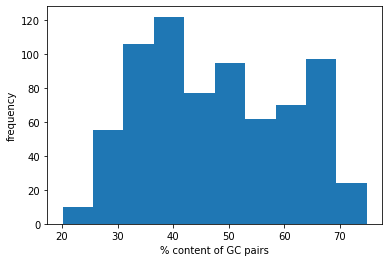

In [24]:
plt.figure()

GC=data['GC']
Size=data['size']

plt.hist(GC)
plt.xlabel('% content of GC pairs')
plt.ylabel('frequency')

plt.show()

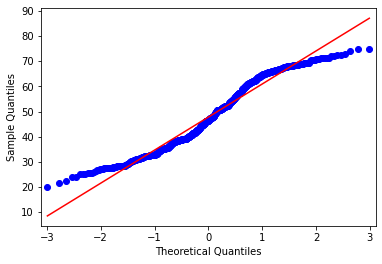

In [25]:
from statsmodels.graphics.gofplots import qqplot

qqplot(GC, line='s')
plt.show()

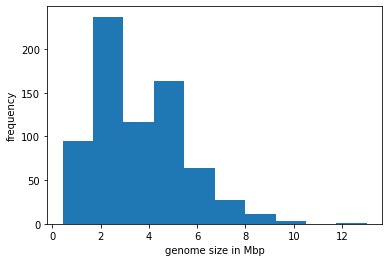

In [26]:
plt.figure()

plt.hist(Size)
plt.xlabel('genome size in Mbp')
plt.ylabel('frequency')
plt.show()

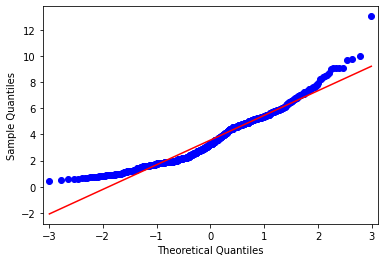

In [27]:
qqplot(Size, line='s')
plt.show()

#### Testing for Normality using SPSS

GC

$H_0:$ The sample is from a normally distributed population
$H_1:$ The sample is not from a normally distributed population

Size

$H_0:$ The sample is from a normally distributed population
$H_1:$ The sample is not from a normally distributed population


#### Testing function

In [17]:
stat, p = shapiro(data['size'])
alpha = 0.05


def testing (p, alpha):
    if p > alpha:
        print('Sample distribution similar to a normal distribution (there is no reason to reject H0)')
    else:
        print('Sample distribution other than normal distribution (can be rejected H0)')

testing(p, alpha)

Sample distribution other than normal distribution (can be rejected H0)


#### Assuming that the GC variable is from a normally distributed population

$H_0:$ No significant differences in stat. between the habitats of organisms and the average content of GC pairs

$H_1:$ There are significant stats. differences between the habitats of organisms and the average content of GC pairs

In [28]:
print(data.info()) #coding

#the habitat must be changed into a categorical variable
data['habitat'] = data['habitat'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 723
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   organism     718 non-null    object 
 1   group        718 non-null    object 
 2   size         718 non-null    float64
 3   GC           718 non-null    float64
 4   habitat      704 non-null    object 
 5   temp.group   718 non-null    object 
 6   temperature  398 non-null    float64
dtypes: float64(3), object(4)
memory usage: 33.7+ KB
None


In [29]:
#creating a linear model
model =ols("GC ~ habitat", data= data).fit()
#anova
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
habitat,8928.975213,4.0,13.973147,5.666201e-11
Residual,111666.928409,699.0,NaN,NaN


#### Post-hoc

In [30]:
tukey = pairwise_tukeyhsd(endog=data['GC'].astype('float'),
                          groups=list(data['habitat']), alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aquatic,Host-associated,-4.4132,0.0178,-8.3504,-0.4761,True
Aquatic,Multiple,1.7907,0.7944,-2.3459,5.9273,False
Aquatic,Specialized,0.3658,0.9,-5.1371,5.8688,False
Aquatic,Terrestrial,9.0644,0.0013,2.465,15.6639,True
Aquatic,nan,3.6491,0.9,-6.5837,13.8818,False
Host-associated,Multiple,6.204,0.001,2.8324,9.5755,True
Host-associated,Specialized,4.7791,0.066,-0.1746,9.7327,False
Host-associated,Terrestrial,13.4777,0.001,7.3288,19.6266,True
Host-associated,nan,8.0623,0.1888,-1.8858,18.0105,False
Multiple,Specialized,-1.4249,0.9,-6.5385,3.6887,False


#### Variance model where the value of the GC pair value is tested in relation to the place of existence of microorganisms and their group of existence

In [31]:
data_new = data.rename(columns={'temp.group': 'temp_group'})
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 723
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   organism     718 non-null    object  
 1   group        718 non-null    object  
 2   size         718 non-null    float64 
 3   GC           718 non-null    float64 
 4   habitat      704 non-null    category
 5   temp_group   718 non-null    object  
 6   temperature  398 non-null    float64 
dtypes: category(1), float64(3), object(3)
memory usage: 31.7+ KB


In [15]:
#data_new['habitat'] = data_new['habitat'].astype('category')
#data_new['GC'] = data_new['GC'].astype('float')
#data_new['temp_group'] = data_new['temp_group'].astype('category')


#### Model without interaction

$H_0:$ No significant differences in stat. between the habitats of organisms and the average content of GC pairs


$H_1:$ There are significant stats. differences between the habitats of organisms and the average content of GC pairs

$H_0:$ No significant differences in stat. between the temp group of organisms and the average content of GC pairs

$H_1:$ There are significant stats. differences between the temp group of organisms and the average content of GC pairs

In [32]:
model2 =ols("GC ~ habitat+temp_group", data= data_new).fit()

In [33]:
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
habitat,9287.938552,4.0,14.646662,1.708814e-11
temp_group,1327.708002,3.0,2.791648,3.964533e-02
Residual,110339.220408,696.0,NaN,NaN


#### Model with interaction

$H_0:$ No significant differences in stat. between the habitats of organisms and the average content of GC pairs

$H_1:$ There are significant stats. differences between the habitats of organisms and the average content of GC pairs

$H_0:$ No significant differences in stat. between the temp group of organisms and the average content of GC pairs

$H_1:$ There are significant stats. differences between the temp group of organisms and the average content of GC pairs

$H_0:$ No impact of iteration between temp_group and habitat

$H_1:$ Effect of iteration between temp_group and habitat

In [34]:
model3 =ols("GC ~ habitat*temp_group", data= data_new).fit()
aov_table3 = sm.stats.anova_lm(model3, typ=2)
aov_table3

d:\programy\python\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
d:\programy\python\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
d:\programy\python\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
habitat,951.911555,4.0,1.486983,0.226780
temp_group,535.013051,3.0,1.114327,0.291514
habitat:temp_group,561.888055,12.0,0.292576,0.982879
Residual,109947.972373,687.0,NaN,NaN
